In [1]:
# Importing the libraries for Gradient Boosting Classifier (XGBoost) model
import pandas as pd
import numpy as np
import io
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Company_House_Info.csv to Company_House_Info (2).csv


In [4]:
import io
SKG = pd.read_csv(io.BytesIO(uploaded['Company_House_Info (2).csv']))

In [5]:
# Selecting the  relevant features only
required_features = [
    "Bankrupt?", " ROA(C) before interest and depreciation before interest",
    " ROA(A) before interest and % after tax", " ROA(B) before interest and depreciation after tax",
    " Operating Gross Margin", " Realized Sales Gross Margin", " Operating Profit Rate",
    " Pre-tax net Interest Rate", " After-tax net Interest Rate", " Non-industry income and expenditure/revenue",
    " Continuous interest rate (after tax)", " Operating Expense Rate",
    " Research and development expense rate", " Cash flow rate",
    " Interest-bearing debt interest rate", " Tax rate (A)",
    " Net Value Per Share (B)", " Net Value Per Share (A)", " Net Value Per Share (C)",
    " Persistent EPS in the Last Four Seasons", " Cash Flow Per Share"
]

In [28]:
# Checking for missing values and general statistics
print("Missing Values:")
print(SKG.isnull().sum())
print("\nDataset Summary Statistics:")
print(SKG.describe())

Missing Values:
Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
Realized Sales Gross Margin                                0
Operating Profit Rate                                      0
Pre-tax net Interest Rate                                  0
After-tax net Interest Rate                                0
Non-industry income and expenditure/revenue                0
Continuous interest rate (after tax)                       0
Operating Expense Rate                                     0
Research and development expense rate                      0
Cash flow rate                                             0
Interest-bearing debt interest rate                        0
Tax rate (A)                                               0
Net Valu

In [42]:
import plotly.express as px

# Treemap for showing the proportion of 'Bankrupt?' vs non-bankrupt
fig = px.treemap(SKG, path=['Bankrupt?'], title="Treemap of Bankruptcy Status")
fig.show()

In [43]:
#Normalisation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)

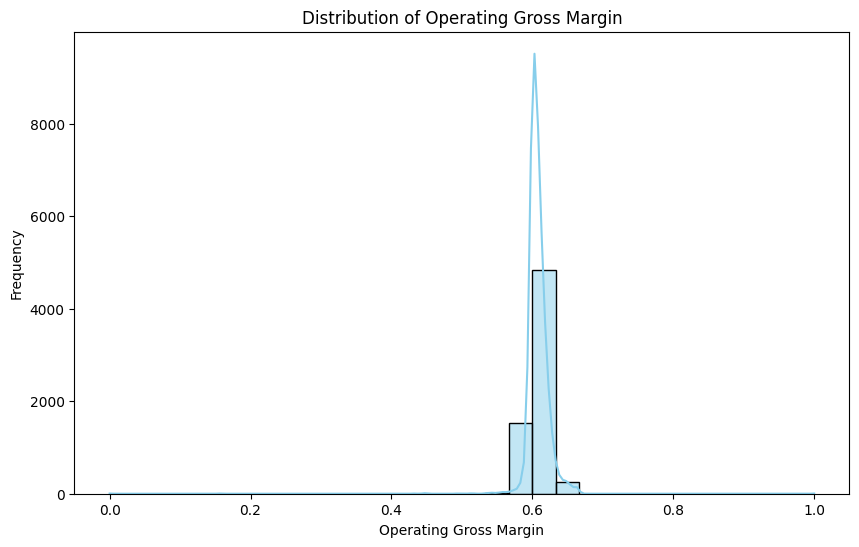

In [35]:
# Histogram for a continuous feature (e.g., 'Operating Gross Margin')
plt.figure(figsize=(10, 6))
sns.histplot(SKG['Operating Gross Margin'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Operating Gross Margin')
plt.xlabel('Operating Gross Margin')
plt.ylabel('Frequency')
plt.show()

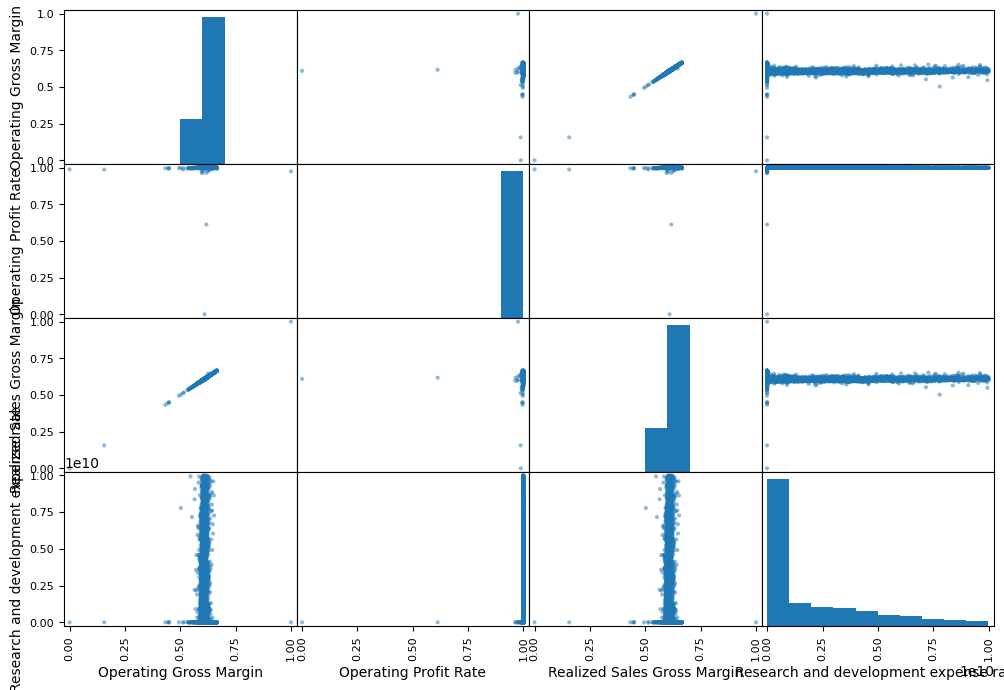

In [40]:

from pandas.plotting import scatter_matrix

# Scatter matrix for a subset of features
scatter_matrix(SKG[['Operating Gross Margin', 'Operating Profit Rate', 'Realized Sales Gross Margin', 'Research and development expense rate']], figsize=(12, 8), diagonal='hist')
plt.show()

In [6]:
# Subsetting the dataset
SKG = SKG[required_features]

In [7]:
# Cleaning column names
SKG.columns = [col.strip() for col in SKG.columns]

In [8]:
# Separating features and target variable
X = SKG.drop(columns=["Bankrupt?"])
y = SKG["Bankrupt?"]

In [9]:
# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78eaa6e3f490>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


In [10]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [11]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

In [12]:
# Initialize the XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [13]:
from xgboost import XGBClassifier

In [14]:
# Train the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [15]:
# Evaluate the model
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

In [44]:
#Hypertuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}


In [16]:
# Classification report
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred))

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1934
           1       0.94      0.99      0.97      1934

    accuracy                           0.97      3868
   macro avg       0.97      0.97      0.97      3868
weighted avg       0.97      0.97      0.97      3868



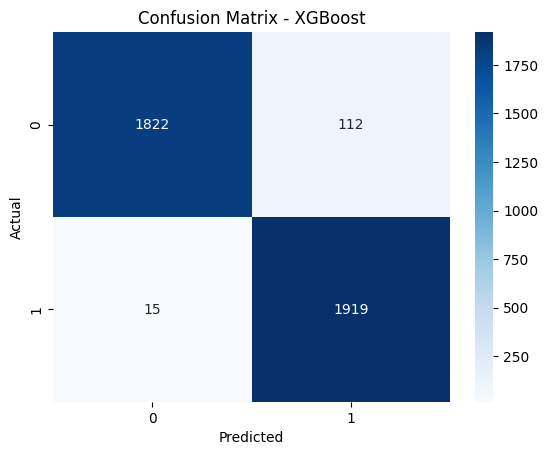

In [17]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

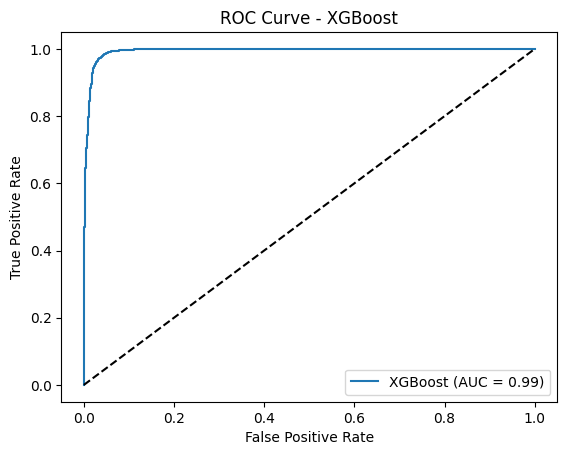

In [18]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

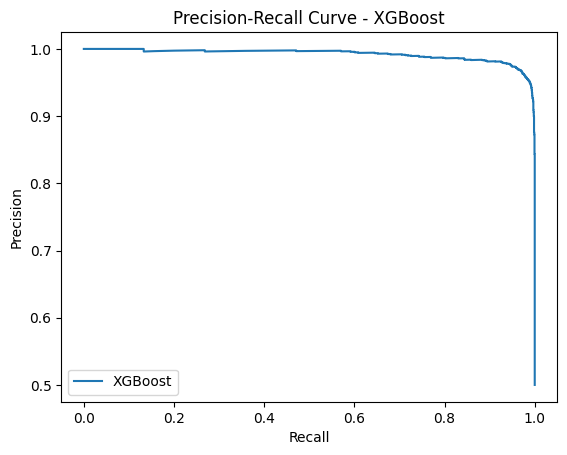

In [19]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, label="XGBoost")
plt.title("Precision-Recall Curve - XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [45]:
pip install shap

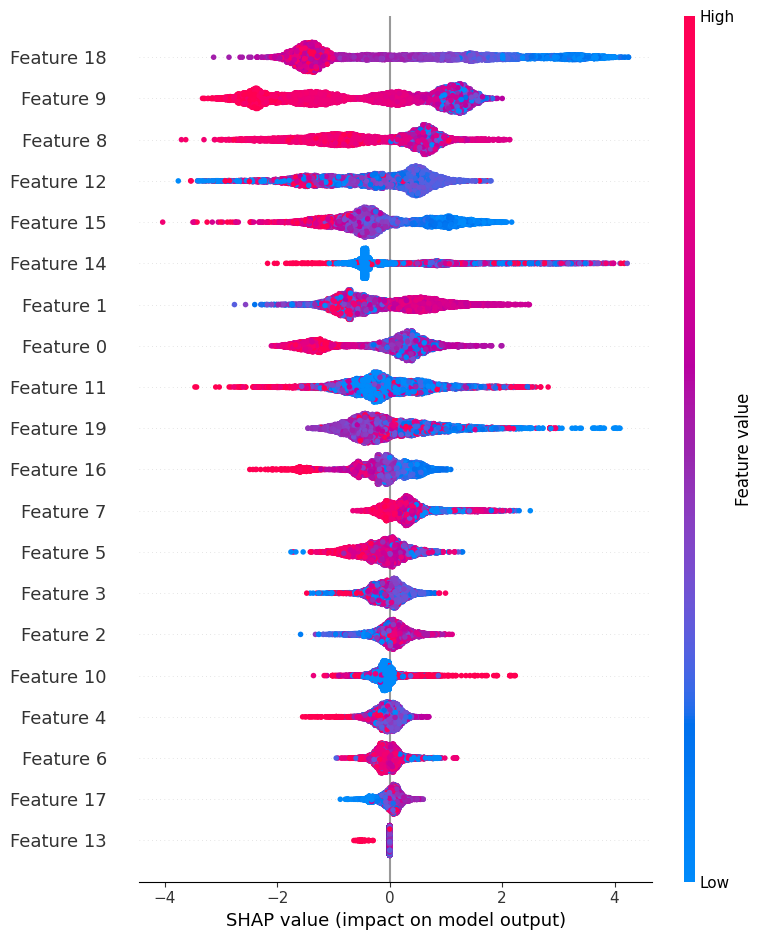

In [46]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(xgb)
shap_values = explainer(X_train)

# Plot feature importance
shap.summary_plot(shap_values, X_train)

<Figure size 1000x600 with 0 Axes>

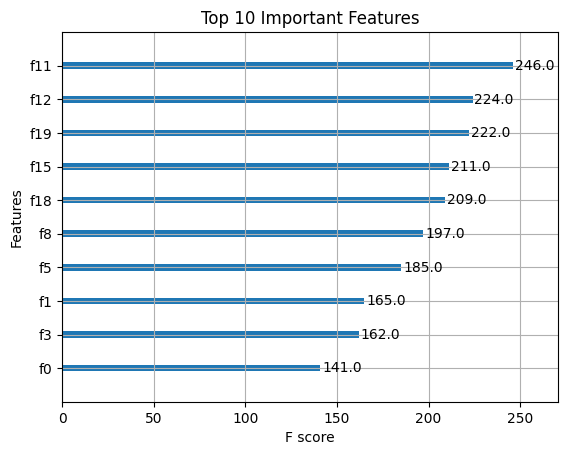

In [49]:
from xgboost import plot_importance
plt.figure(figsize=(10, 6))
plot_importance(xgb, importance_type='weight', max_num_features=10)
plt.title('Top 10 Important Features')
plt.show()

In [20]:
  # Cross-validation score
cv_score = cross_val_score(xgb, X_train, y_train, cv=5, scoring='f1').mean()
print(f"Cross-Validated F1 Score for XGBoost: {cv_score:.2f}")


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Cross-Validated F1 Score for XGBoost: 0.96


In [50]:
# F1-score caluclation
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)

In [51]:
#Accuracy caluclation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [52]:
# Summary of results
print(f"\nModel Evaluation Summary:")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print(f"Cross-Validated F1 Score: {cv_score:.2f}")


Model Evaluation Summary:
Accuracy: 0.97
F1 Score: 0.97
ROC-AUC Score: 0.99
Cross-Validated F1 Score: 0.96
